## Analysing the Stock Market

In this work we focus on analysing historical fund returns, calculating portfolio performance to track performance of two portfolios relative to each other and we backtest by specifying initial capital and excluding transaction costs(e.g., commissions) and any other trading related expenses.

Objectives
1. How to extract historical data, preprocess data to handle inconsistencies, conduct Exploratory data analysis to identify patterns and relationships. We also do feature extraction to create features like annualized returns, annualized volatility etc.
2. The results are extracted using python and verification
is done by constructing the portfolio. The built-in
portfolio is cross-checked using a backtesting method
and stocks found under anomalous behavior are
moved out from the portfolio


The following topics will be covered:

1. Downloading stock market data
(using yfinance.download())

2. Calculating stock performance
(Annualized Returns, Annualized Volatility)

3. Evaluating portfolio performance
(Correlation, Portfolio Values, Cumulative Return Ratio, Annualized Returns, Annualized Volatility, Sharpe Ratio)

4. Hierarchical Risk Parity (HRP) and Efficient Frontier
(Optimization, Discrete Allocations) in the next notebook.

In [1]:
#!pip install yfinance
#!pip install mplfinance
#!pip install plotly --user
#!pip install seaborn
#!pip install statsmodels

In [2]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from plotly import express as px
import datetime as dt
import os

pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

*Download Data from Yahoo!*

- Load past daily stock prices including “Adj Close”, “Close”, “High”, “Low”, “Open” and “Volume” of 5 stocks which are Tiger Brands Limited (TBS.JO), Hosken Consolidated Investments Limited (HCI.JO), MTN Group Limited (MTN.JO), Naspers Limited (NPN.JO) and Oceana Group Ltd (OCE.JO).

- Download other periodic data like in days, weeks and months.

In [30]:
import yfinance as yf
stock_list = ['TBS.JO', 'HCI.JO', 'MTN.JO', 'NPN.JO', 'OCE.JO']
print('stock_list:', stock_list)

interval = '1d' #1wk, 1mo
data = yf.download(stock_list, interval=interval, period='max', start="2017-01-01", end="2023-09-01")

print('data fields download:')
set(data.columns.get_level_values(0))

data.head()

stock_list: ['TBS.JO', 'HCI.JO', 'MTN.JO', 'NPN.JO', 'OCE.JO']
[*********************100%%**********************]  5 of 5 completed
data fields download:


Adj Close                                                  Close  \
               HCI.JO     MTN.JO      NPN.JO    OCE.JO     TBS.JO     HCI.JO   
Date                                                                           
2017-01-02 12,696.661  9,490.672 124,420.227 8,475.730 28,910.223 13,560.000   
2017-01-03 12,696.661  9,778.770 125,697.734 8,475.730 28,656.613 13,560.000   
2017-01-04 12,409.205 10,004.436 124,640.766 8,448.185 28,391.363 13,253.000   
2017-01-05 12,133.925  9,831.427 124,931.719 8,510.341 28,526.527 12,959.000   
2017-01-06 12,262.203 10,150.363 131,055.461 8,485.618 28,876.799 13,096.000   

                                                              High             \
               MTN.JO      NPN.JO     OCE.JO     TBS.JO     HCI.JO     MTN.JO   
Date                                                                            
2017-01-02 12,617.000 126,542.859 12,000.000 36,889.805 13,560.000 12,617.000   
2017-01-03 13,000.000 127,842.164 12,000.000 36,566.188 13,600.000 13,000.000   
2017-01-04 13,300.000 126,767.164 11,961.000 36,227.730 13,560.000 13,341.000   
2017-01-05 13,070.000 127,063.086 12,049.000 36,400.203 13,323.000 13,422.000   
2017-01-06 13,494.000 133,291.297 12,014.000 36,847.152 13,276.000 13,494.000   

                                                    Low             \
                NPN.JO     OCE.JO     TBS.JO     HCI.JO     MTN.JO   
Date                                                                 
2017-01-02 126,542.859 12,000.000 36,889.805 13,560.000 12,617.000   
2017-01-03 128,535.164 12,100.000 37,034.461 13,200.000 12,630.000   
2017-01-04 127,842.164 12,195.000 36,575.461 13,132.000 12,753.000   
2017-01-05 129,737.078 12,194.000 36,719.188 12,959.000 13,013.000   
2017-01-06 133,521.891 12,150.000 37,224.551 12,969.000 13,030.000   

                                                   Open             \
                NPN.JO     OCE.JO     TBS.JO     HCI.JO     MTN.JO   
Date                                                                 
2017-01-02 126,542.859 12,000.000 36,889.805 13,560.000 12,617.000   
2017-01-03 126,549.773 11,900.000 36,404.840 13,600.000 12,630.000   
2017-01-04 124,527.945 11,827.000 35,845.695 13,250.000 12,991.000   
2017-01-05 125,972.375 11,900.000 35,839.203 13,200.000 13,350.000   
2017-01-06 128,229.188 11,828.000 35,991.277 12,969.000 13,100.000   

                                             Volume                           \
                NPN.JO     OCE.JO     TBS.JO HCI.JO   MTN.JO   NPN.JO OCE.JO   
Date                                                                           
2017-01-02 126,542.859 12,000.000 36,889.805      0        0        0      0   
2017-01-03 127,989.180 12,099.000 36,627.387  11243  3696450   723201   3685   
2017-01-04 127,508.539 11,827.000 36,566.188  20042  5760484  1213053   2901   
2017-01-05 128,172.016 12,194.000 36,627.387  37489  5211365  1147575   7338   
2017-01-06 128,799.047 12,116.000 36,399.277   9565  8823205  1512599   5324   

                    
            TBS.JO  
Date                
2017-01-02       0  
2017-01-03  259663  
2017-01-04  673999  
2017-01-05  454007  
2017-01-06  626517

downloads historical stock price data for each stock in stock_list and saves it to a CSV file named after the stock symbol. It's a useful approach to save historical data for multiple stocks to individual CSV files.

In [37]:
startdate = '2019-01-01'
enddate = '2023-09-01'
# enddate =   dt.datetime.now().date()    #change to current day date if required
interval = '1d'

In [38]:
for stock in stock_list:
    df = yf.download(stock, interval=interval, period='max')
    df.to_csv('stocks_data\\{}.csv'.format(stock))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Append historical stock price data from multiple CSV files into a single DataFrame and select the 'Adj Close' column for each stock.

In [39]:
def appending(cols=[], startdate='', enddate=''):
    '''append stocks data into one file and then select the 'Adj Close' column'''
    dates = pd.date_range(start=startdate, end=enddate)
    df = pd.DataFrame(index=dates)
    for stock in stock_list:
        df_stock = pd.read_csv('stocks_data\\{}.csv'.format(stock), index_col='Date', parse_dates=True, usecols=cols, na_values=['NaN'])
        df_stock = df_stock.rename(columns = {'Adj Close': stock})
        df = df.join(df_stock)
        df = df.loc[dates]
    df.index.names = ['Date']
    df = df.dropna()    #there are other ways to handle missing values. For simplicity, drop them for now
    return df

df = appending(['Date', 'Adj Close'], startdate, enddate)
df.head()

,TBS.JO,HCI.JO,MTN.JO,NPN.JO,OCE.JO
Date,,,,,
2019-01-02,"20,374.002","11,646.166","7,310.094","173,278.047","5,459.033"
2019-01-03,"20,905.531","11,878.139","7,258.839","173,526.906","5,253.201"
2019-01-04,"20,785.186","11,922.785","7,334.461","177,539.953","5,224.116"
2019-01-07,"20,620.096","11,793.697","7,351.266","175,567.641","5,294.964"
2019-01-08,"20,606.977","11,683.050","7,268.082","176,418.812","5,257.675"


In [40]:
df.tail()

,TBS.JO,HCI.JO,MTN.JO,NPN.JO,OCE.JO
Date,,,,,
2023-08-28,"16,480.000","23,460.000","12,600.000","319,216.000","6,997.000"
2023-08-29,"16,582.000","23,200.000","12,485.000","322,642.000","7,033.000"
2023-08-30,"16,596.000","22,963.000","12,510.000","318,405.000","7,020.000"
2023-08-31,"16,341.000","22,890.000","12,032.000","321,699.000","6,933.000"
2023-09-01,"16,374.000","22,492.000","12,253.000","324,508.000","6,870.000"


Statistics

In [41]:
df_desc = df.describe().T
df_desc[['count', 'mean', 'std', 'min', '50%', 'max']]

,count,mean,std,min,50%,max
TBS.JO,"1,168.000","17,664.026","2,173.652","12,654.276","17,812.924","23,068.277"
HCI.JO,"1,168.000","10,474.207","5,683.823","1,594.781","9,214.547","24,000.000"
MTN.JO,"1,168.000","10,366.370","3,770.710","2,620.141","9,479.516","19,958.021"
NPN.JO,"1,168.000","264,031.562","53,629.300","142,318.469","257,303.453","381,380.531"
OCE.JO,"1,168.000","5,602.243",664.658,"4,042.147","5,527.017","7,290.938"


Prices over time view

In [44]:
from plotly import express as px

px.line(data_frame=df, title='Tickers Adj. Close Prices', width=1500, height=500)

#### We want the Relative Stock Movement

Therefore how much the stock went up or down compared to the other stocks.

*Why :* to provide a standardized measure that removes the influence of absolute price levels. Therefore we need to *Normalize* the stock prices to start with.

**formular: divide the prices of each column by Day-One-Price**

In [46]:
df.head()

,TBS.JO,HCI.JO,MTN.JO,NPN.JO,OCE.JO
Date,,,,,
2019-01-02,"20,374.002","11,646.166","7,310.094","173,278.047","5,459.033"
2019-01-03,"20,905.531","11,878.139","7,258.839","173,526.906","5,253.201"
2019-01-04,"20,785.186","11,922.785","7,334.461","177,539.953","5,224.116"
2019-01-07,"20,620.096","11,793.697","7,351.266","175,567.641","5,294.964"
2019-01-08,"20,606.977","11,683.050","7,268.082","176,418.812","5,257.675"


In [47]:
norm = df / df.iloc[0,:]
norm.head()

,TBS.JO,HCI.JO,MTN.JO,NPN.JO,OCE.JO
Date,,,,,
2019-01-02,1.000,1.000,1.000,1.000,1.000
2019-01-03,1.026,1.020,0.993,1.001,0.962
2019-01-04,1.020,1.024,1.003,1.025,0.957
2019-01-07,1.012,1.013,1.006,1.013,0.970
2019-01-08,1.011,1.003,0.994,1.018,0.963


Plot the normalized graphs

In [48]:
fig = px.line(norm, x=norm.index, y=stock_list)
fig.update_layout(title='Stock movement observation by normalizing Adj close prices, (Daily Cumulative Return)',
                  xaxis_title='Date',
                  yaxis_title='Normalized price')
fig.show()

#### Rolling Statistics

Rolling statistics are used to observe trends, patterns and changes over time, while also smoothing out short-term fluctuations.

short-term trends and rapid changes, a smaller window size may be appropriate (e.g., 5-10 periods). For longer-term trends and smoothing out noise, a larger window size (e.g., 20-50 periods) might be more suitable.

In [50]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = df['MTN.JO'].rolling(window=10).mean()
rolling_std = df['MTN.JO'].rolling(window=10).std()

# Calculate lower and upper bounds
lowerbound = rolling_mean - (2 * rolling_std)
upperbound = rolling_mean + (2 * rolling_std)

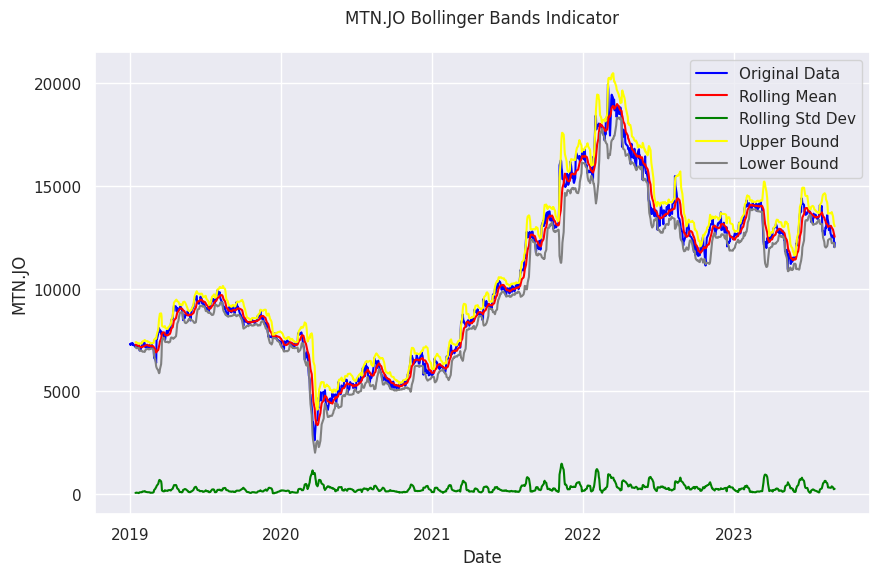

In [51]:
# Plot the original data and rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['MTN.JO'], label='Original Data', color='blue')
plt.plot(df.index, rolling_mean, label='Rolling Mean', color='red')
plt.plot(df.index, rolling_std, label='Rolling Std Dev', color='green')
plt.plot(df.index, upperbound, label='Upper Bound', color='yellow')
plt.plot(df.index, lowerbound, label='Lower Bound', color='grey')
plt.xlabel('Date')
plt.ylabel('MTN.JO')
plt.title('MTN.JO Bollinger Bands Indicator\n')
plt.legend()
plt.show()

conclusion:

Rolling Mean (Moving Average): We see that the rolling mean provides a clearer view of the overall direction or trend of the data.

Rolling Standard Deviation: The rolling standard deviation is lower when the actual data experiences low volatility

## Metrics and Indicators

These metrics provide insights into factors such as profitability, risk, valuation, and market trends. Here are some key stock market analysis metrics:

- Daily Returns Ratio : A measure the percentage change in the price or value of an asset from one trading day to the next.
- Cummulative Returns Ratio : is the Profit/Loss ratio of the stock on a particular period.
- Value-at-Risk (VaR): A measure of the maximum potential loss the asset could experience within a given confidence interval and time horizon.
- Sharpe Ratio

### Daily Returns Ratio:

measure the percentage change in the price or value of an asset from one trading day to the next.

DailyReturns(t) = (price[t]/price[t-1])-1

In [52]:
# To calculate the percentage change for each day
daily_returns = (df / df.shift(1)) -1
daily_returns.iloc[0, :] = 0
daily_returns.head()

,TBS.JO,HCI.JO,MTN.JO,NPN.JO,OCE.JO
Date,,,,,
2019-01-02,0.000,0.000,0.000,0.000,0.000
2019-01-03,0.026,0.020,-0.007,0.001,-0.038
2019-01-04,-0.006,0.004,0.010,0.023,-0.006
2019-01-07,-0.008,-0.011,0.002,-0.011,0.014
2019-01-08,-0.001,-0.009,-0.011,0.005,-0.007


conclusion: Whether low or high daily returns are considered "good" depends on various factors, including the individual investor's goals, risk tolerance, and investment strategy.

Annualized Returns

calculates both the daily returns' mean and the annualized returns for each stock

In [53]:
annualized_returns = df.pct_change().mean().apply(lambda x: x*252)
print(annualized_returns)
print('stock | daily_returns_mean | annualized_returns')
for stock in stock_list:
    print(stock, '|', daily_returns[stock].mean(), '|', round(daily_returns[stock].mean()*252, 3))

TBS.JO   -0.003
HCI.JO    0.288
MTN.JO    0.216
NPN.JO    0.229
OCE.JO    0.099
dtype: float64
stock | daily_returns_mean | annualized_returns
TBS.JO | -1.1714299270812847e-05 | -0.003
HCI.JO | 0.0011433117156423426 | 0.288
MTN.JO | 0.0008572019119078388 | 0.216
NPN.JO | 0.0009072870369295539 | 0.229
OCE.JO | 0.00039169115062441946 | 0.099


conclusion: high annualized return suggests that the investment has generated significant gains over the specified time period.

Annualized Volatility

In [55]:
annualized_volatility = df.pct_change().std().apply(lambda x: x*np.sqrt(252))
print(annualized_volatility)
print('stock | daily_returns_std | annualized_volatility')
for stock in stock_list:
    print(stock, '|', daily_returns[stock].std(), '|', round(daily_returns[stock].std()*np.sqrt(252), 3))

TBS.JO   0.296
HCI.JO   0.547
MTN.JO   0.458
NPN.JO   0.434
OCE.JO   0.314
dtype: float64
stock | daily_returns_std | annualized_volatility
TBS.JO | 0.01866543630557169 | 0.296
HCI.JO | 0.0344354134467292 | 0.547
MTN.JO | 0.028835465116415642 | 0.458
NPN.JO | 0.027332504931638673 | 0.434
OCE.JO | 0.01980167458222762 | 0.314


Low Daily Return Standard Deviation of daily returns suggests relatively stable and predictable price movements.

High annualized volatility suggests that the investment's prices or returns have experienced significant and frequent fluctuations over the year.

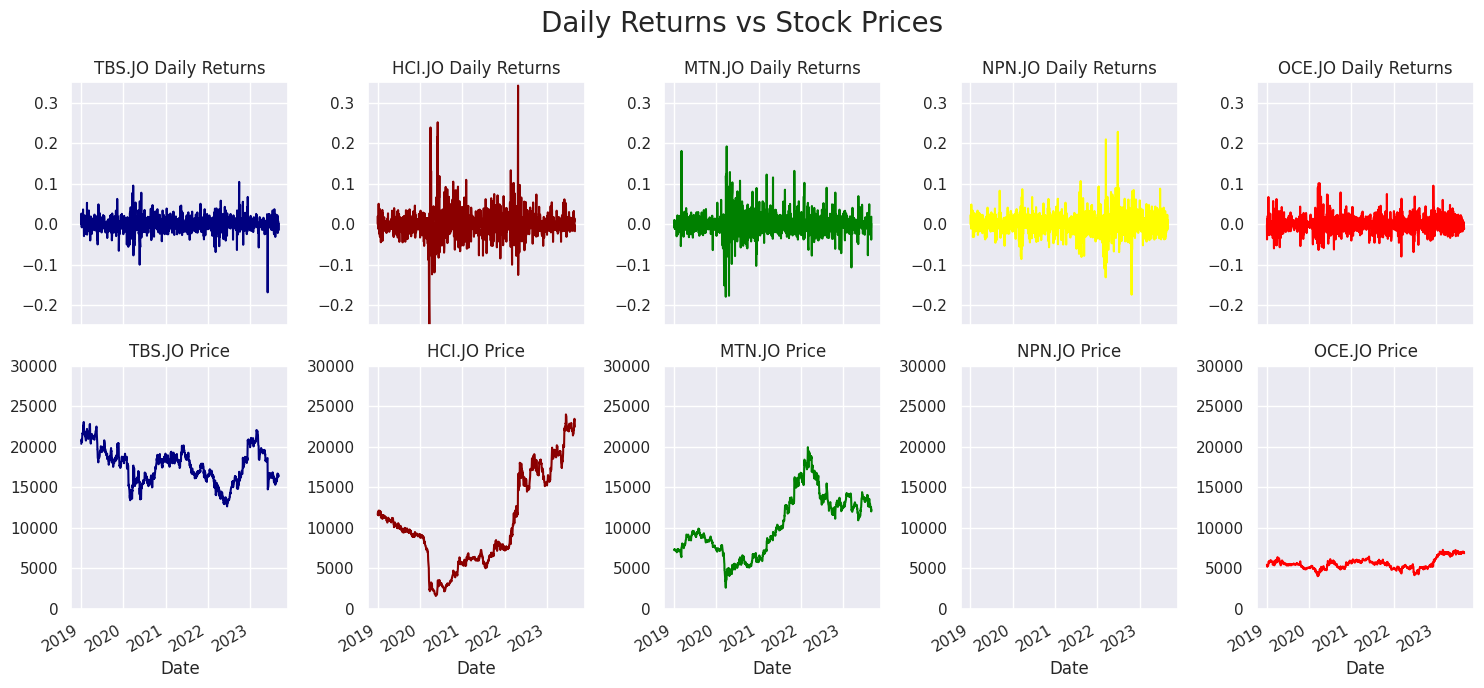

In [58]:
colorlist = ['navy', 'darkred', 'green', 'yellow', 'red']
fig, ax = plt.subplots(2,5, figsize=(15,7), sharex=True)

for i, stock in enumerate(stock_list):
    daily_returns[stock].plot(ax=ax[0][i], color=colorlist[i])
    ax[0][i].set_title(stock + ' Daily Returns')
    ax[0][i].set_ylim(-0.25, 0.35)

    df[stock].plot(ax=ax[1][i], color=colorlist[i])
    ax[1][i].set_title(stock + ' Price')
    ax[1][i].set_ylim(0, 30000)

fig.suptitle('Daily Returns vs Stock Prices', fontsize=20)
plt.tight_layout()

Daily return statistics

1. *The Mean* - use this to calculate Annualized Returns
2. *Standard Deviation* - use this to calculate Annualized Volatility
3. *Kurtosis*: Analyzing kurtosis can help assess the risk and potential outliers associated with each stock's daily returns.

Higher kurtosis values indicate heavier tails (more extreme returns), while lower kurtosis values indicate lighter tails (fewer extreme returns) compared to a normal distribution.

**Types of Kurtosis:**

Fat tails (value is positive): means that there are occasional and more frequent that would happen if we had a regular Gaussin distribution. There are frequently large excursions more frequently than if this was a normal distribution. (More occurrences out in the tails than would be expected if it were a normal distribution).


Skinny tails (value is negative): (Many fewer occurrences out on the tails than would be expected if it were a normal distribution).

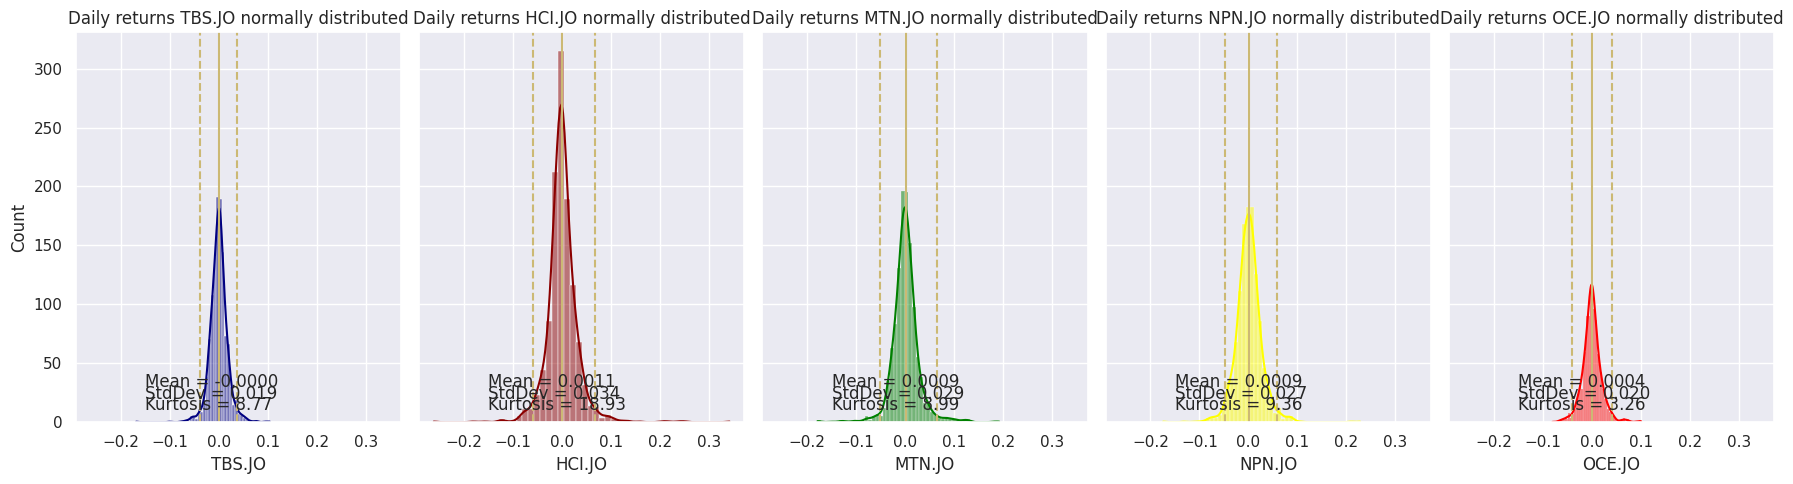

In [60]:
colorlist = ['navy', 'darkred', 'green', 'yellow', 'red']
fig, ax = plt.subplots(1,5, figsize=(18,5), sharex=True, sharey=True)

for i, stock in enumerate(stock_list):
    sns.histplot(daily_returns[stock], bins=50, kde=True, color=colorlist[i], ax=ax[i])
    ax[i].set_title('Daily returns ' + stock + ' normally distributed')
    ax[i].axvline(daily_returns[stock].mean(), c='y')
    ax[i].axvline(np.percentile(daily_returns[stock],97.5), linestyle='--', c='y')
    ax[i].axvline(np.percentile(daily_returns[stock],2.5), linestyle='--', c='y')
    ax[i].text(-0.15, 30, 'Mean = {:.4f}'.format(daily_returns[stock].mean()))
    ax[i].text(-0.15, 20, 'StdDev = {:.3f}'.format(daily_returns[stock].std()))
    ax[i].text(-0.15, 10, 'Kurtosis = {:.2f}'.format(daily_returns[stock].kurtosis()))

plt.tight_layout()

Based on Kurtosis results: Indicates the presence of outliers and potential for more extreme events.

We are considering two general properties indicated by the histogram for each stock:
1. Return and
2. Volatility (or risk).

The histograms are displayed side by side in a single figure, making it easier to compare the distribution of returns between different stocks.

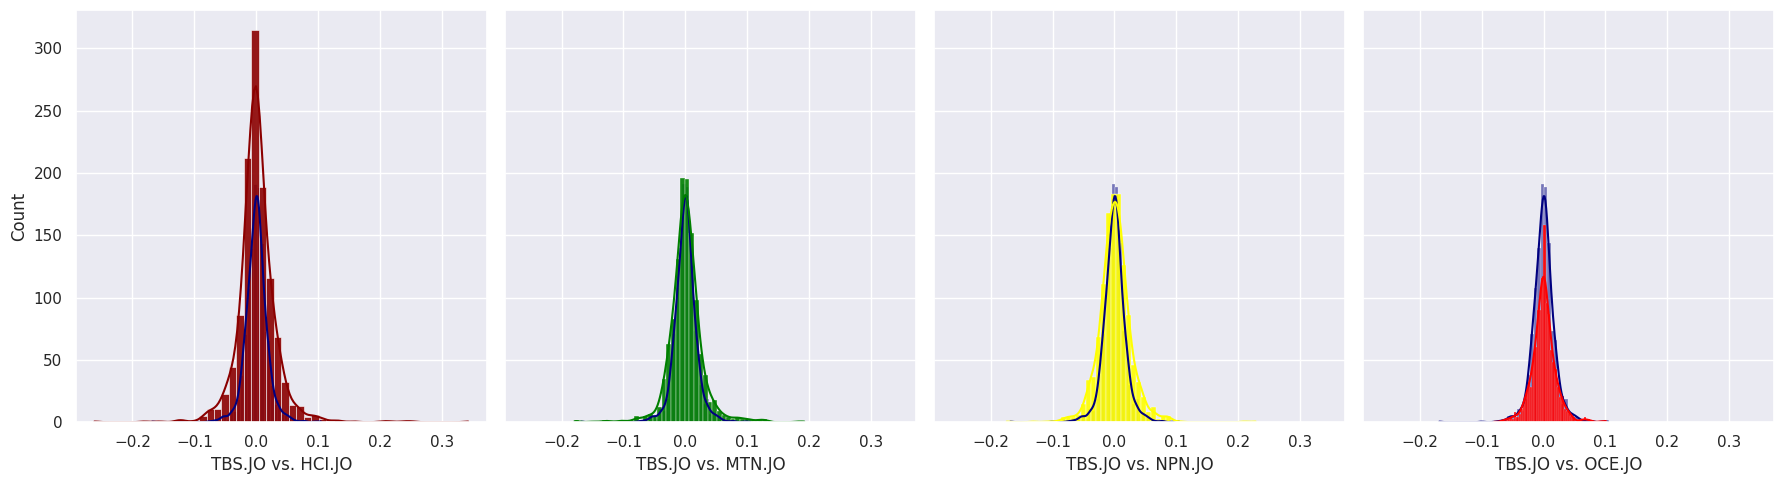

In [61]:
fig, ax = plt.subplots(1,4, figsize=(18,5), sharex=True, sharey=True)
sns.histplot(daily_returns['TBS.JO'], bins=50, color='navy', ax=ax[0], kde=True)
sns.histplot(daily_returns['HCI.JO'], bins=50, color='darkred', ax=ax[0], kde=True, alpha=0.9)
ax[0].set_xlabel('TBS.JO vs. HCI.JO')
sns.histplot(daily_returns['TBS.JO'], bins=50, color='navy', ax=ax[1], kde=True)
sns.histplot(daily_returns['MTN.JO'],  bins=50, color='green', ax=ax[1], kde=True, alpha=0.9)
ax[1].set_xlabel('TBS.JO vs. MTN.JO')
sns.histplot(daily_returns['TBS.JO'], bins=50, color='navy', ax=ax[2], kde=True)
sns.histplot(daily_returns['NPN.JO'], bins=50, color='yellow', ax=ax[2], kde=True, alpha=0.9)
ax[2].set_xlabel('TBS.JO vs. NPN.JO')
sns.histplot(daily_returns['TBS.JO'], bins=50, color='navy', ax=ax[3], kde=True)
sns.histplot(daily_returns['OCE.JO'], bins=50, color='red', ax=ax[3], kde=True, alpha=0.9)
ax[3].set_xlabel('TBS.JO vs. OCE.JO')
plt.tight_layout()

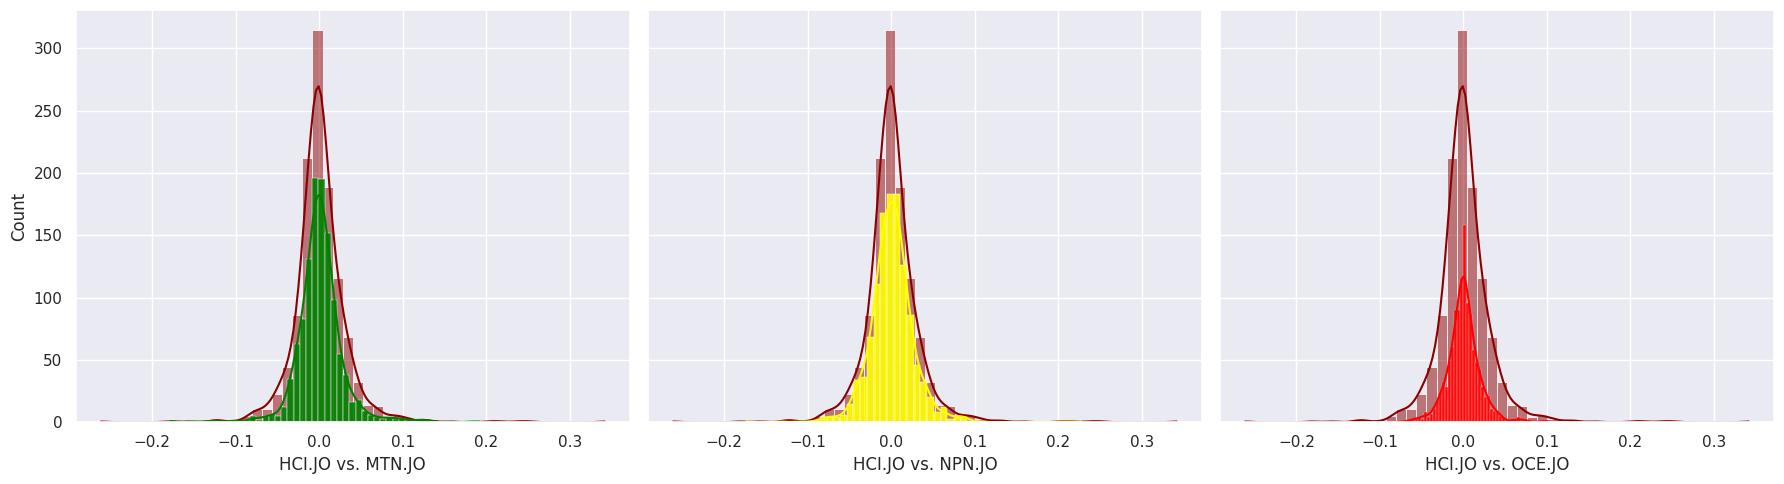

In [62]:
fig, ax = plt.subplots(1,3, figsize=(18,5), sharex=True, sharey=True)
sns.histplot(daily_returns['HCI.JO'], bins=50, color='darkred', ax=ax[0], kde=True)
sns.histplot(daily_returns['MTN.JO'],  bins=50, color='green', ax=ax[0], kde=True, alpha=0.9)
ax[0].set_xlabel('HCI.JO vs. MTN.JO')
sns.histplot(daily_returns['HCI.JO'], bins=50, color='darkred', ax=ax[1], kde=True)
sns.histplot(daily_returns['NPN.JO'], bins=50, color='yellow', ax=ax[1], kde=True, alpha=0.9)
ax[1].set_xlabel('HCI.JO vs. NPN.JO')
sns.histplot(daily_returns['HCI.JO'], bins=50, color='darkred', ax=ax[2], kde=True)
sns.histplot(daily_returns['OCE.JO'], bins=50, color='red', ax=ax[2], kde=True, alpha=0.9)
ax[2].set_xlabel('HCI.JO vs. OCE.JO')
plt.tight_layout()

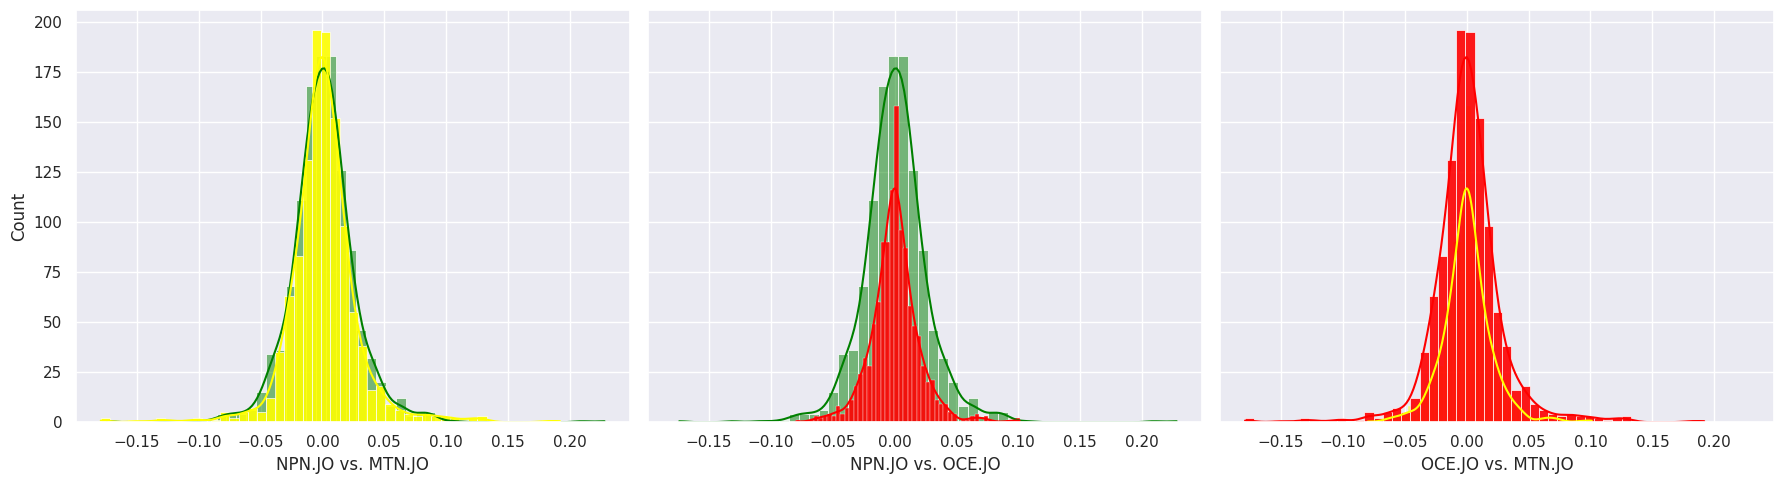

In [63]:
fig, ax = plt.subplots(1,3, figsize=(18,5), sharex=True, sharey=True)
sns.histplot(daily_returns['NPN.JO'], bins=50, color='green', ax=ax[0], kde=True)
sns.histplot(daily_returns['MTN.JO'], bins=50, color='yellow', ax=ax[0], kde=True, alpha=0.9)
ax[0].set_xlabel('NPN.JO vs. MTN.JO')
sns.histplot(daily_returns['NPN.JO'], bins=50, color='green', ax=ax[1], kde=True)
sns.histplot(daily_returns['OCE.JO'], bins=50, color='red', ax=ax[1], kde=True, alpha=0.9)
ax[1].set_xlabel('NPN.JO vs. OCE.JO')
sns.histplot(daily_returns['OCE.JO'], bins=50, color='yellow', ax=ax[2], kde=True)
sns.histplot(daily_returns['MTN.JO'], bins=50, color='red', ax=ax[2], kde=True, alpha=0.9)
ax[2].set_xlabel('OCE.JO vs. MTN.JO')
plt.tight_layout()

In [64]:
df_ret_vol = pd.concat([annualized_returns.to_frame('Annualized Returns'), annualized_volatility.to_frame('Annualized Volatility')], axis=1)
print(df_ret_vol)

        Annualized Returns  Annualized Volatility
TBS.JO              -0.003                  0.296
HCI.JO               0.288                  0.547
MTN.JO               0.216                  0.458
NPN.JO               0.229                  0.434
OCE.JO               0.099                  0.314


For returns comparison, refer to Normalization plot. For volatility comparison, refer to the above plot (fat/wider means higher volatility)

1. HCI has higher return and higher volatility than all of them
2. TBS has lower return and lower volatility than all of them
3. OCE has lower return and slightly lower volatility than HCI, MTN and NPN
4. MTN has lower return than HCI and NPN and higher volatility than TBS, NPN and OCE

A portfolio is a collection of a number of stocks with different allocations. Before building a portfolio, we need to understand the concept of correlations.

Correlation is a statistical measure that describes the extent to which two variables are related. In the context of investing, correlation refers to the relationship between the prices of two or more assets.

#### Correlations

In [65]:
daily_returns.corr()

,TBS.JO,HCI.JO,MTN.JO,NPN.JO,OCE.JO
TBS.JO,1.000,0.101,0.198,0.133,0.129
HCI.JO,0.101,1.000,0.238,0.005,0.054
MTN.JO,0.198,0.238,1.000,0.108,0.200
NPN.JO,0.133,0.005,0.108,1.000,0.088
OCE.JO,0.129,0.054,0.200,0.088,1.000


[[1.         0.10113696]
 [0.10113696 1.        ]]
[[1.         0.19765346]
 [0.19765346 1.        ]]
[[1.         0.13333992]
 [0.13333992 1.        ]]
[[1.        0.1291664]
 [0.1291664 1.       ]]
[[1.         0.05421068]
 [0.05421068 1.        ]]
[[1.         0.23830896]
 [0.23830896 1.        ]]
[[1.         0.00539244]
 [0.00539244 1.        ]]
[[1.         0.10841581]
 [0.10841581 1.        ]]
[[1.         0.20037099]
 [0.20037099 1.        ]]
[[1.         0.08822344]
 [0.08822344 1.        ]]


<Axes: >

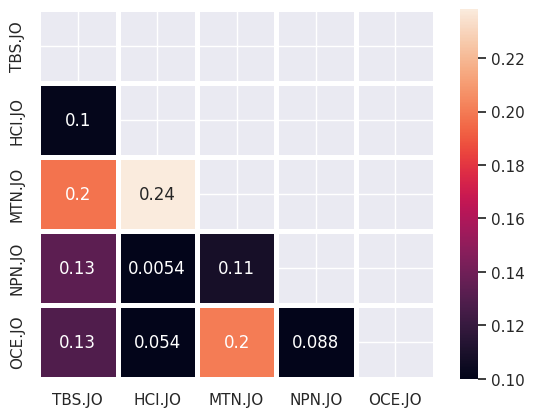

In [66]:
print(np.corrcoef(daily_returns['TBS.JO'], daily_returns['HCI.JO']))
print(np.corrcoef(daily_returns['TBS.JO'], daily_returns['MTN.JO']))
print(np.corrcoef(daily_returns['TBS.JO'], daily_returns['NPN.JO']))
print(np.corrcoef(daily_returns['TBS.JO'], daily_returns['OCE.JO']))
print(np.corrcoef(daily_returns['HCI.JO'], daily_returns['OCE.JO']))
print(np.corrcoef(daily_returns['HCI.JO'], daily_returns['MTN.JO']))
print(np.corrcoef(daily_returns['HCI.JO'], daily_returns['NPN.JO']))
print(np.corrcoef(daily_returns['MTN.JO'], daily_returns['NPN.JO']))
print(np.corrcoef(daily_returns['MTN.JO'], daily_returns['OCE.JO']))
print(np.corrcoef(daily_returns['NPN.JO'], daily_returns['OCE.JO']))

import seaborn as sns

#take the bottom triangle since it repeats itself
mask = np.zeros_like(daily_returns.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(daily_returns.corr(), annot=True, vmin=0.1, mask=mask, linewidths=2.5)

The low p-value suggests that there may be some non-linear or complex relationship between the daily returns of these stocks that is not captured by the Pearson correlation coefficient.

Create a scatter plot with a regression line to visualize the relationship between the daily returns of 'TBS.JO' and 'MTN.JO.'

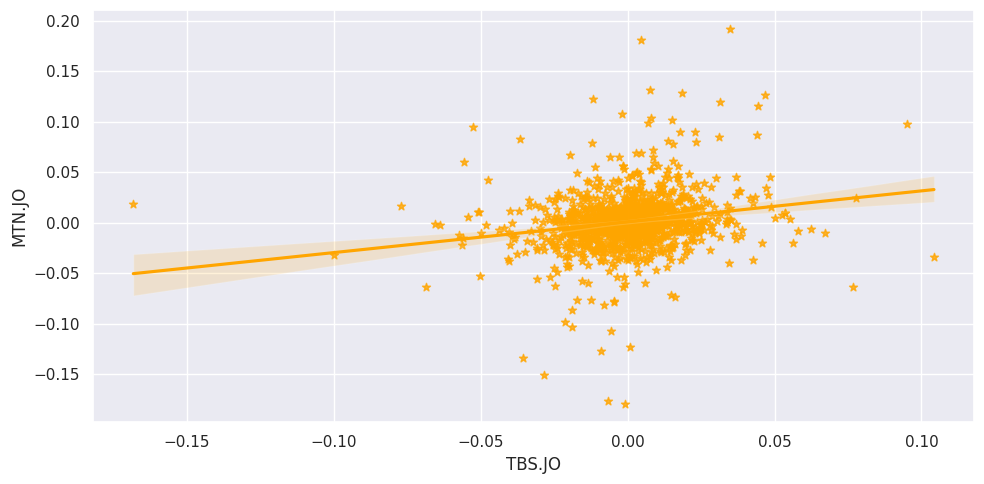

In [67]:
fig, ax = plt.subplots(1,1, figsize=(10,5), sharex=True, sharey=True)
sns.regplot(data=daily_returns, x=daily_returns['TBS.JO'], y=daily_returns['MTN.JO'] ,scatter=True, marker='*', ax=ax, color='orange')
plt.tight_layout()

*Correlation Coefficient and P-value*

In [68]:
coeff, pval = stats.pearsonr(daily_returns['TBS.JO'], daily_returns['MTN.JO'])
print('CorrCoeff TBS/MTN= {:,.0f}'.format(coeff), 'Pval={}'.format(pval))

CorrCoeff TBS/MTN= 0 Pval=9.418801546824017e-12


β (Beta = Slop): is how reactive is the market to the stock.

α (Alpha = Intercept): is how well the market performs with respect of stock

In the context of the Capital Asset Pricing Model (CAPM), beta represents the stock's sensitivity to market movements, while alpha represents the stock's excess return (or abnormal return) compared to the expected return based on its beta.

In [70]:
beta_MTN_TBS, alpha_MTN_TBS = np.polyfit(daily_returns['TBS.JO'], daily_returns['MTN.JO'],1)
print('beta TBS/MTN= {}'.format(beta_MTN_TBS), 'alpha TBS/MTN= {}'.format(alpha_MTN_TBS))

beta TBS/MTN= 0.30534669912129175 alpha TBS/MTN= 0.0008607788345227003


conclusion:  'MTN' is less sensitive to market movements compared to 'TBS' A beta less than 1 indicates that 'MTN' is less volatile and has lower market sensitivity than the market as a whole.

When TBS price goes up 1%, MTN goes up by 0.31%

In [72]:
#!pip install statsmodels

In [75]:
import statsmodels.api as sm

ml = daily_returns.copy()
ml['intercept'] = 1
lm = sm.OLS(ml['HCI.JO'], ml[['intercept', 'TBS.JO']])
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HCI.JO   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     12.05
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           0.000537
Time:                        12:20:43   Log-Likelihood:                 2283.8
No. Observations:                1168   AIC:                            -4564.
Df Residuals:                    1166   BIC:                            -4553.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.001      1.142      0.254      -0.001       0.003
TBS.JO         0.1866      0.054      3.471      0.001       0.081       0.292
==============================================================================
Omnibus:                      496.644   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16589.335
Skew:                           1.306   Prob(JB):                         0.00
Kurtosis:                      21.277   Cond. No.                         53.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- When TBS price goes up 1%, MTN goes up by 0.31%
- adjusted R-squared value is 0.009 indicates that adding 'TBS' as a predictor does not significantly improve the model's explanatory power.
- 1% of the variability in MTN price can be explained by TBS price.

### Cumulative Return Ratio:

is the Profit/Loss ratio of the stock on a particular period.

CR(t) = (price[t]/price[0])-1

In [76]:
print('Cumulative return of TBS is: {:.0f} %'.format(((df.iloc[-1]['TBS.JO'] / df.iloc[0]['TBS.JO']) - 1) * 100))
print('Cumulative return of HCI is: {:.0f} %'.format(((df.iloc[-1]['HCI.JO'] / df.iloc[0]['HCI.JO']) - 1) * 100))
print('Cumulative return of MTN is: {:.0f} %'.format(((df.iloc[-1]['MTN.JO'] / df.iloc[0]['MTN.JO']) - 1) * 100))
print('Cumulative return of NPN is: {:.0f} %'.format(((df.iloc[-1]['NPN.JO'] / df.iloc[0]['NPN.JO']) - 1) * 100))
print('Cumulative return of OCE is: {:.0f} %'.format(((df.iloc[-1]['OCE.JO'] / df.iloc[0]['OCE.JO']) - 1) * 100))

Cumulative return of TBS is: -20 %
Cumulative return of HCI is: 93 %
Cumulative return of MTN is: 68 %
Cumulative return of NPN is: 87 %
Cumulative return of OCE is: 26 %


HCI stock price increased by 93% while MTN stock price increased by 68% during the period and NPN stock price increased 87% and OCE stock price increased by 26%.
During the same period the TBS decreased by -20%.

### Daily Portfolio Value (DPV):
Calculating overall value of a portfolio Day by Day

Given:
- start value (start_val): Portfolio Value (the amount of investment)
- start date and end date
- allocations (allocs): allocating the portfolio value on the stocks
- Position value (pos_val): at each day, that's how much that position is worth
- Portfolio value (portfolio_daily_returns): reflects the value each day for our total portfolio

- normailze the prices = price/price[0]
- allocs = norm * allocations
- pos_val = allocs * start_value
- portfolio_daily_returns = pos_val.sum(axis=1)
- Portfolio Statistics

Daily return of portfolio
- Mean and StdDev
- Portfolio Performance Metrics

Portfolio Values
-Annualized Returns
- Annualized Volatility
- Sharpe Ratio

### Portfolio 1 vs Portfolio 2

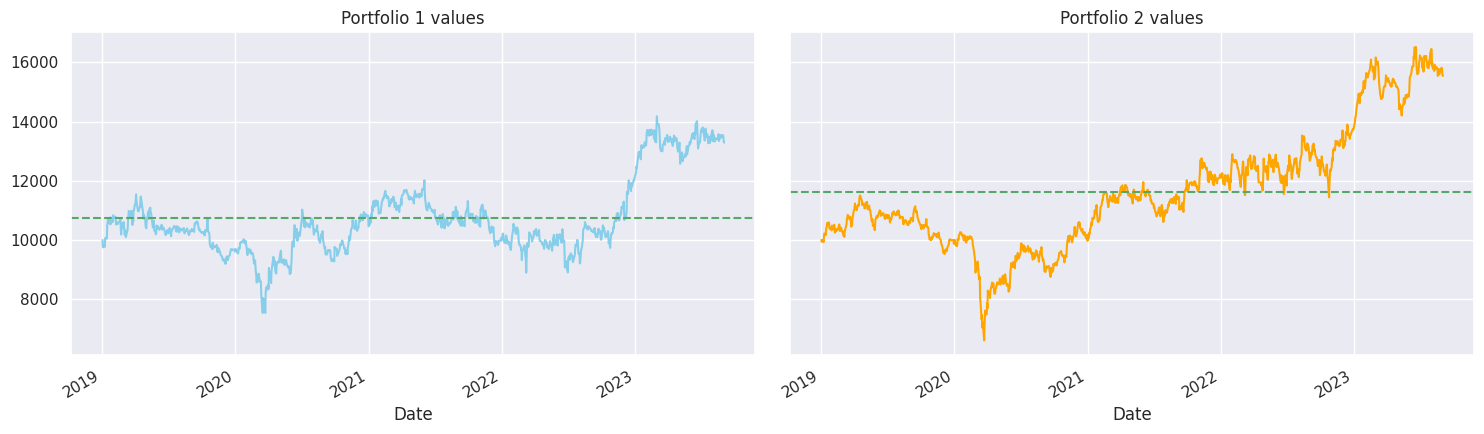

In [77]:
def portval (allocations = [], start_value = 0):
    '''to get daily portfolio value based on allocation'''
    allocs = norm.copy() * allocations
    pos_val = allocs * start_value
    port_val = pos_val.sum(axis=1)
    return port_val

fig, ax = plt.subplots(1, 2, figsize=(15, 4.5), sharex=True, sharey=True)

#assume our start value = R10 000
#baseline allocation: 10% TKG, 5% APH, 5% GFI, 10% BYI, 70% DTC
port_val1 = portval([0.1, 0.05, 0.05, 0.1, 0.7], 10000)
port_val1.plot(ax=ax[0], color='skyblue')
ax[0].axhline(np.mean(port_val1), linestyle='--', c='g')
ax[0].set_title('Portfolio 1 values')

#new allocation: 10% TKG, 20% APH, 20% GFI, 20% BYI, 30% DTC
port_val2 = portval([0.1, 0.2, 0.2, 0.2, 0.3], 10000)
port_val2.plot(ax=ax[1], color='orange')
ax[1].axhline(np.mean(port_val2), linestyle='--', c='g')
ax[1].set_title('Portfolio 2 values')
plt.tight_layout()

Portfolio Values

In [78]:
print('Portfolio 1 Value:  $', round(port_val1[-1], 2))
print('Portfolio 2 Value:  $', round(port_val2[-1], 2))

Portfolio 1 Value:  $ 13289.41
Portfolio 2 Value:  $ 15539.49


Cumulative Return Ratio of DPV

In [79]:
cum_return1 = ((port_val1.iloc[-1] / port_val1.iloc[0]) -1) * 100
print('Cumulative return of Portfolio 1 is {:.1f} %'.format(cum_return1))
cum_return2 = ((port_val2.iloc[-1] / port_val2.iloc[0]) -1) * 100
print('Cumulative return of Portfolio 2 is {:.1f} %'.format(cum_return2))

Cumulative return of Portfolio 1 is 32.9 %
Cumulative return of Portfolio 2 is 55.4 %


Portfolio 2 has a higher cumulative return, suggesting better performance compared to Portfolio 1 over the specified period.

Mean and Std Dev of DPV (Daily Portfolio Value)

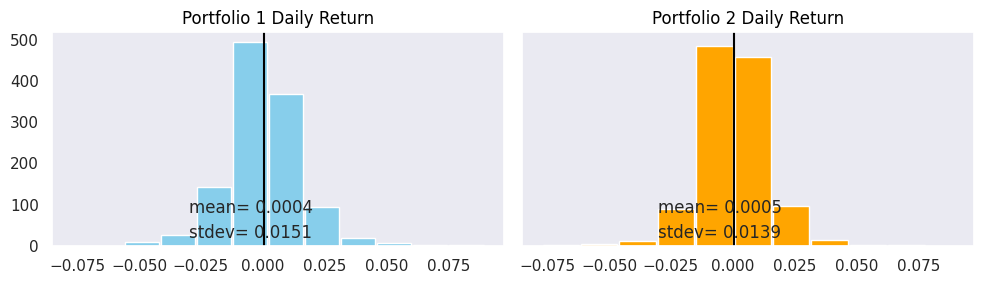

In [80]:
portfolio_daily_returns1 = port_val1.pct_change()
portfolio_daily_returns1.iloc[0] = 0

portfolio_daily_returns2 = port_val2.pct_change()
portfolio_daily_returns2.iloc[0] = 0

fig, ax = plt.subplots(1, 2, figsize=(10,3), sharex=True, sharey=True)

portfolio_daily_returns1.hist(grid=False, rwidth=0.95, ax=ax[0], color='skyblue')
ax[0].axvline(np.mean(portfolio_daily_returns1), c='black')
ax[0].text(-0.03, 80, 'mean= {:.4f}'.format(np.mean(portfolio_daily_returns1)))
ax[0].text(-0.03, 20, 'stdev= {:.4f}'.format(np.std(portfolio_daily_returns1)))
ax[0].set_title('Portfolio 1 Daily Return', c='black')

portfolio_daily_returns2.hist(grid=False, rwidth=0.95, ax=ax[1], color='orange')
ax[1].axvline(np.mean(portfolio_daily_returns2), c='black')
ax[1].text(-0.03, 80, 'mean= {:.4f}'.format(np.mean(portfolio_daily_returns2)))
ax[1].text(-0.03, 20, 'stdev= {:.4f}'.format(np.std(portfolio_daily_returns2)))
ax[1].set_title('Portfolio 2 Daily Return', c='black')
plt.tight_layout()

In [81]:
print('Portfolio 1')
print('Mean (Return) Value = {:.2f}'.format(np.mean(port_val1.iloc[1:])), ' ' , 'Standard Deviation (Volatility) Value = {:.2f}'.format(np.std(port_val1.iloc[1:])))
print('Mean (Return) Ratio = {:.2f}'.format(np.mean(portfolio_daily_returns1) * 100),'%', '  ' , 'Standard Deviation (Volatility) Ratio = {:.2f} %'.format(np.std(portfolio_daily_returns1) * 100))
print('Portfolio 2')
print('Mean (Return) Value = {:.2f}'.format(np.mean(port_val2.iloc[1:])), ' ' ,'Standard Deviation (Volatility) Value = {:.2f}'.format(np.std(port_val2.iloc[1:])))
print('Mean (Return) Ratio = {:.2f}'.format(np.mean(portfolio_daily_returns2) * 100),'%', '  ' , 'Standard Deviation (Volatility) Ratio = {:.2f} %'.format(np.std(portfolio_daily_returns2) * 100))

Portfolio 1
Mean (Return) Value = 10733.73   Standard Deviation (Volatility) Value = 1260.04
Mean (Return) Ratio = 0.04 %    Standard Deviation (Volatility) Ratio = 1.51 %
Portfolio 2
Mean (Return) Value = 11629.49   Standard Deviation (Volatility) Value = 1992.33
Mean (Return) Ratio = 0.05 %    Standard Deviation (Volatility) Ratio = 1.39 %


CONCLUSION:

**Portfolio 1**:

Mean (Return) Value: The average daily return in monetary terms for Portfolio 1 is approximately 10,733.73 units of currency. This represents the typical daily increase in the portfolio's value.

Standard Deviation (Volatility) Value: The standard deviation of approximately 1,260.04 units of currency measures the daily variability or volatility of Portfolio 1.

Mean (Return) Ratio: This means that, on average, Portfolio 1 gains or loses 0.04% of its initial value each day.

Standard Deviation (Volatility) Ratio: This indicates that the daily price fluctuations of Portfolio 1 amount to about 1.51% of its initial value.

# Portfolio 2:

Mean (Return) Value: Portfolio 2 has a slightly higher average daily return in monetary terms compared to Portfolio 1, with a value of approximately 11,629.49 units of currency.

Standard Deviation (Volatility) Value: Portfolio 2 exhibits greater daily price variability, as indicated by its higher standard deviation of approximately 1,992.33 units of currency.

Mean (Return) Ratio: The mean daily return as a percentage of the initial portfolio value for Portfolio 2 is approximately 0.05%, slightly higher than that of Portfolio 1.

Standard Deviation (Volatility) Ratio: suggesting that its daily price fluctuations are about 1.39% of its initial value.

Annualized Returns

In [82]:
annualized_returns1 = port_val1.pct_change().mean() * 252
annualized_returns2 = port_val2.pct_change().mean() * 252

print('Portfolio 1 Annualized Returns: ', round(annualized_returns1, 3))
print('Portfolio 2 Annualized Returns: ', round(annualized_returns2, 3))

Portfolio 1 Annualized Returns:  0.09
Portfolio 2 Annualized Returns:  0.12


conclusion:

Portfolio 2 has a higher estimated annualized return (12%) compared to Portfolio 1 (9%). This suggests that Portfolio 2 may offer potentially higher long-term returns for investors.

Annualized Volatility

In [83]:
annualized_volatility1 = port_val1.pct_change().std() * np.sqrt(252)
annualized_volatility2 = port_val2.pct_change().std() * np.sqrt(252)

print('Portfolio 1 Annualized Volatility: ', round(annualized_volatility1, 3))
print('Portfolio 2 Annualized Volatility: ', round(annualized_volatility2, 3))

Portfolio 1 Annualized Volatility:  0.24
Portfolio 2 Annualized Volatility:  0.221


conclusion:

Portfolio 2 exhibits higher annualized volatility compared to Portfolio 1. This indicates that Portfolio 2 experiences larger daily price fluctuations on average, which can be both an opportunity and a risk.

We can notice clearly that the return of Portfolio 2 is higher than that of Portfolio 1, but the risk (StdDev) is also higher, and we already expected this (high risk = high returns)

#### SHARPE RATIO:

is a metric that evaluates risk and returns together, in order to help investors in the selection of such investment that generates higher returns for the optimal risk taken.

*For comparison:* The higher the sharpe ratio the better

In [84]:
portfolio_daily_returns1 = port_val1.pct_change()
SR1 = np.sqrt(252) * np.mean(portfolio_daily_returns1) / np.std(portfolio_daily_returns1)
print('Sharpe Ratio Portfolio 1 = {:.3f}%'.format(SR1))

portfolio_daily_returns2 = port_val2.pct_change()
SR2 = np.sqrt(252) * np.mean(portfolio_daily_returns2) / np.std(portfolio_daily_returns2)
print('Sharpe Ratio Portfolio 2 = {:.3f}%'.format(SR2))

Sharpe Ratio Portfolio 1 = 0.376%
Sharpe Ratio Portfolio 2 = 0.542%


conclusion:

This ratio indicates that, on a risk-adjusted basis, Portfolio 1 is generating a return that is slightly higher than the risk-free rate.

Portfolio 2 is generating a return that is more favorable compared to the risk-free rate.

Portfolio 1 value = $13289
Portfolio 2 value = $15539


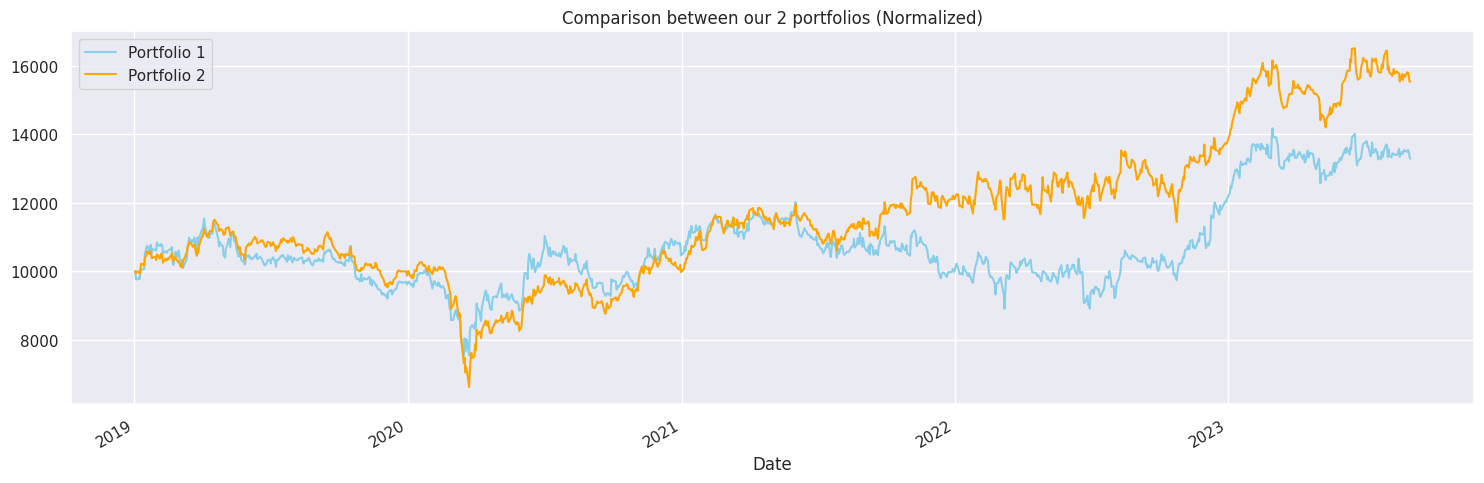

In [85]:
fig, ax = plt.subplots(figsize=(15, 5))
port_val1.plot(ax=ax, color='skyblue')
port_val2.plot(ax=ax, color='orange')
plt.legend(['Portfolio 1', 'Portfolio 2'])
plt.title('Comparison between our 2 portfolios (Normalized)')
print('Portfolio 1 value = ${:.0f}'.format(port_val1[-1]))
print('Portfolio 2 value = ${:.0f}'.format(port_val2[-1]))
plt.tight_layout()

confirming the above result, we can see here the Sharpe Ratio of Portfolio 2 is higher than portfolio 1